In [2]:
import unicodecsv
with open('enrollments.csv','rb') as f:
    reader=unicodecsv.DictReader(f)
    enrollments=list(reader)
with open('daily_engagement.csv','rb') as f:
    reader=unicodecsv.DictReader(f)
    daily_work=list(reader)   
with open('project_submissions.csv','rb') as f:
    reader=unicodecsv.DictReader(f)
    projects=list(reader)   
    
print(enrollments[0])
print(daily_work[0])
print(projects[0])
    

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [3]:
import unicodecsv
def read_csv(filename):
    with open(filename,'rb') as f:
        reader=unicodecsv.DictReader(f)
        return list(reader)
    
enrollments=read_csv('enrollments.csv')    
daily_engagement=read_csv('daily_engagement.csv')  
project_submissions=read_csv('project_submissions.csv')    
    
print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]    
    
print(daily_engagement[0])    
    
enrollments[0]

OrderedDict([('acct', '0'), ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0)])


OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [5]:
for i in daily_engagement:
    i['account_key']=i['acct']
    del(i['acct'])

In [6]:
print("No.of entries in enrollments.csv:",len(enrollments))
print("No.of entries in daily_engagement.csv:",len(daily_engagement))
print("No.of entries in project_submissions.csv:",len(project_submissions))

def uni(l):
    a=set()
    for i in l:
        a.add(i['account_key'])
    return a

print("NO.OF UNIQUE STUDENTS IN enrollments.csv:",len(uni(enrollments)))
print("NO.OF UNIQUE STUDENTS IN daily_engagement.csv:",len(uni(daily_engagement)))
print("NO.OF UNIQUE STUDENTS IN project_submissions.csv:",len(uni(project_submissions)))

No.of entries in enrollments.csv: 1640
No.of entries in daily_engagement.csv: 136240
No.of entries in project_submissions.csv: 3642
NO.OF UNIQUE STUDENTS IN enrollments.csv: 1302
NO.OF UNIQUE STUDENTS IN daily_engagement.csv: 1237
NO.OF UNIQUE STUDENTS IN project_submissions.csv: 743


In [7]:
x=uni(daily_engagement)
for i in enrollments:
    k=i['account_key']
    if(k not in x):
        print(i)
        break

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


In [8]:
for i in enrollments:
    k=i['account_key']
    if((k not in x) and (i['join_date']!=i['cancel_date'])):
       print(i)

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


In [9]:
udacity_test_accounts=set()
for i in enrollments:
    if(i['is_udacity']):
        udacity_test_accounts.add(i['account_key'])
len(udacity_test_accounts)        

6

In [10]:
def remove_test_data(data):
    new_data=[]
    for i in data:
        if(i['account_key'] not in udacity_test_accounts):
              new_data.append(i)
                
    return new_data

In [11]:
enrollments1=remove_test_data(enrollments)
print(len(enrollments1))

daily_engagement1=remove_test_data(daily_engagement)
print(len(daily_engagement1))

project_submissions1=remove_test_data(project_submissions)
print(len(project_submissions1))

1622
135656
3634


In [12]:
paid_students={}
for i in enrollments1:
    if(not i['is_canceled'] or i['days_to_cancel']>7):
        accnt=i['account_key']
        enroll_date=i['join_date']
        if(accnt not in paid_students or enroll_date>paid_students[accnt]):
            paid_students[accnt]=enroll_date
print(len(paid_students))        

995


In [13]:
def within_one_week(join_date,engagement_date):
    ans=engagement_date-join_date
    return ans.days<7 and ans.days>=0

In [14]:
def remove_unpaid_students(data):
    new_data=[]
    for i in data:
        if(i['account_key'] in paid_students):
            new_data.append(i)
    return new_data        

In [15]:
paid_enrollments=remove_unpaid_students(enrollments1)
paid_daily_engagement=remove_unpaid_students(daily_engagement1)
paid_project_submissions=remove_unpaid_students(project_submissions1)

print(len(paid_enrollments))
print(len(paid_daily_engagement))
print(len(paid_project_submissions))

1293
134549
3618


In [16]:
paid_engagement_in_first_week=[]
for i in paid_daily_engagement:
    engage_date=i['utc_date']
    join_date=paid_students[i['account_key']]
    if(within_one_week(join_date,engage_date)):
        paid_engagement_in_first_week.append(i)
        
len(paid_engagement_in_first_week)        

6919

In [17]:
noof_students_who_submitted_projects=set()
for i in paid_project_submissions:
    noof_students_who_submitted_projects.add(i['account_key'])
    
len(noof_students_who_submitted_projects)    

731

In [18]:
from collections import defaultdict
def grouping_records(data,key_name):
    group_data=defaultdict(list)
    for i in data:
        group_data[i[key_name]].append(i) 
    return group_data
        
def group_total_by_key(data,key):
    group_total={}
    for accnt,records in data.items():
        total=0
        for j in records:
            total+=j[key]
        group_total[accnt]=total 
    return group_total    
    

In [19]:
import numpy as np
def describe_data(total):
    print("mean:",np.mean(total))
    print("standard deviation:",np.std(total))    
    print("maximum:",np.max(total))   
    print("minimum:",np.min(total))

In [20]:
engagement_by_account=grouping_records(paid_engagement_in_first_week,'account_key')
total_minutes_by_account=group_total_by_key(engagement_by_account,'total_minutes_visited')
total_minutes=list(total_minutes_by_account.values())
describe_data(total_minutes)

mean: 306.70832675342825
standard deviation: 412.99693340852957
maximum: 3564.7332644989997
minimum: 0.0


In [21]:
max_minutes=0
student_with_max_minutes=None
for accnt,record in total_minutes_by_account.items():
    if(record>max_minutes):
        student_with_max_minutes=accnt
        max_minutes=record
        
print(max_minutes)        
        

3564.7332644989997


In [151]:
for record in paid_engagement_in_first_week:
    if(record['account_key']==student_with_max_minutes):
        print(record)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_courses_visited', 3), ('total_minutes_visited', 471.2139785), ('lessons_completed

In [152]:
total_lessons_by_account=group_total_by_key(engagement_by_account,'lessons_completed')
total_lessons=list(total_lessons_by_account.values())
describe_data(total_lessons)   

mean: 1.636180904522613
standard deviation: 3.002561299829423
maximum: 36
minimum: 0


In [153]:
def group_number(data,key):
    grouped_result={}
    for accnt,records in data.items():
        count=0
        for j in records:
            if(j[key]>0):
                count+=1
        grouped_result[accnt]=count        
    return grouped_result

In [154]:
noof_visit_per_week_by_account=group_number(engagement_by_account,'num_courses_visited')
total_days=list(noof_visit_per_week_by_account.values())
describe_data(total_days)

mean: 2.8673366834170855
standard deviation: 2.2551980029196814
maximum: 7
minimum: 0


In [155]:
print(paid_project_submissions[1])

OrderedDict([('creation_date', datetime.datetime(2015, 1, 10, 0, 0)), ('completion_date', datetime.datetime(2015, 1, 13, 0, 0)), ('assigned_rating', 'INCOMPLETE'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [157]:
pass_projects=set()
for i in paid_project_submissions:
    if((i['lesson_key']=='3176718735' or i['lesson_key']=='746169184')and (i['assigned_rating']=='PASSED' or i['assigned_rating']=='DISTINCTION')):
        pass_projects.add(i['account_key'])
print(len(pass_projects))

647


In [161]:
passing_engagement=[]
non_passing_engagement=[]
for i in paid_engagement_in_first_week:
    if(i['account_key'] in pass_projects):
        passing_engagement.append(i)
    else:
        non_passing_engagement.append(i)
        
print(len(passing_engagement))       
print(len(non_passing_engagement))        

4527
2392


In [163]:
print(passing_engagement[0])
print(non_passing_engagement[0])

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 8, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '653')])


passing engagement results of total minutes:
mean: 394.58604648350865
standard deviation: 448.4995193265521
maximum: 3564.7332644989997
minimum: 0.0


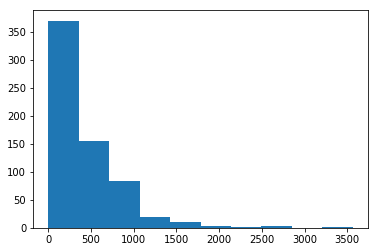

non-passing engagement results of total minutes:
mean: 143.32647426675584
standard deviation: 269.5386190114951
maximum: 1768.5227493319999
minimum: 0.0


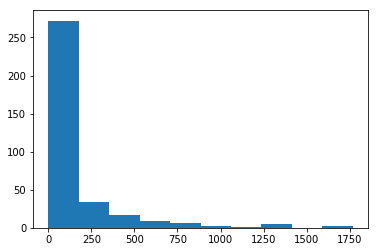

In [173]:
from matplotlib import pyplot as plt
% matplotlib inline
print("passing engagement results of total minutes:")
engagement_by_account=grouping_records(passing_engagement,'account_key')
total_minutes_by_account=group_total_by_key(engagement_by_account,'total_minutes_visited')
total_minutes=list(total_minutes_by_account.values())
describe_data(total_minutes)
plt.hist(total_minutes)
plt.show()
print("non-passing engagement results of total minutes:")
engagement_by_account=grouping_records(non_passing_engagement,'account_key')
total_minutes_by_account=group_total_by_key(engagement_by_account,'total_minutes_visited')
total_minutes=list(total_minutes_by_account.values())
describe_data(total_minutes)
plt.hist(total_minutes)
plt.show()

passing engagement results of total lessons:
mean: 2.052550231839258
standard deviation: 3.1422270555779344
maximum: 36
minimum: 0


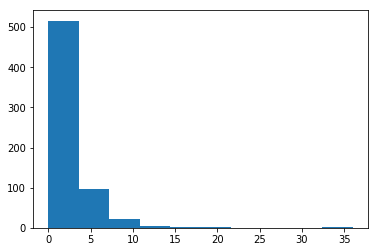

non-passing engagement results of total lessons:
mean: 0.8620689655172413
standard deviation: 2.5491599418312028
maximum: 27
minimum: 0


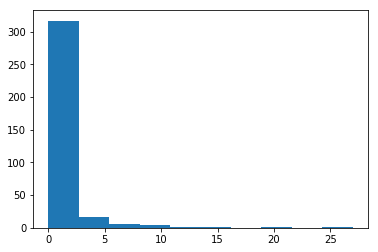

In [176]:
print("passing engagement results of total lessons:")
engagement_by_account=grouping_records(passing_engagement,'account_key')
total_lessons_by_account=group_total_by_key(engagement_by_account,'lessons_completed')
total_lessons=list(total_lessons_by_account.values())
describe_data(total_lessons) 
plt.hist(total_lessons)
plt.show()
print("non-passing engagement results of total lessons:")
engagement_by_account=grouping_records(non_passing_engagement,'account_key')
total_lessons_by_account=group_total_by_key(engagement_by_account,'lessons_completed')
total_lessons=list(total_lessons_by_account.values())
describe_data(total_lessons) 
plt.hist(total_lessons)
plt.show()

passing engagement results of no.of days visit per week:
mean: 3.384853168469861
standard deviation: 2.2588214709184595
maximum: 7
minimum: 0


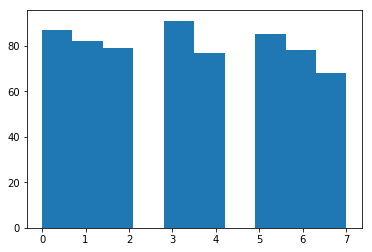

non-passing engagement results of no.of days visit per week:
mean: 1.9051724137931034
standard deviation: 1.9057314413619046
maximum: 7
minimum: 0


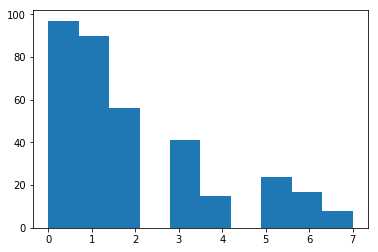

In [177]:
print("passing engagement results of no.of days visit per week:")
engagement_by_account=grouping_records(passing_engagement,'account_key')
noof_visit_per_week_by_account=group_number(engagement_by_account,'num_courses_visited')
total_days=list(noof_visit_per_week_by_account.values())
describe_data(total_days) 
plt.hist(total_days)
plt.show()
print("non-passing engagement results of no.of days visit per week:")
engagement_by_account=grouping_records(non_passing_engagement,'account_key')
noof_visit_per_week_by_account=group_number(engagement_by_account,'num_courses_visited')
total_days=list(noof_visit_per_week_by_account.values())
describe_data(total_days) 
plt.hist(total_days)
plt.show()

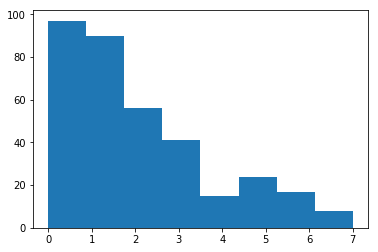

In [180]:
import seaborn as se
plt.hist(total_days,bins=8)
plt.show()